# OASIS INFOBYTE INTERNSHIP

## NAME :- HARSHAWARDHAN CHITNIS 
## POSITION :- Data Science Intern

### TASK : 5
### PROJECT NAME : SALES PREDICTION USING PYTHON


### PROBLEM STATEMENT : Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

# STARTING WITH THE PROJECT 

## Importing Modules / Libraries 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset 

In [2]:
dataset = pd.read_csv("Advertising.csv")

In [3]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
dataset.shape

(200, 5)

In [7]:
newdataset = dataset.drop('Unnamed: 0' , axis=1)

/Users/harshawardhanchitnis/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


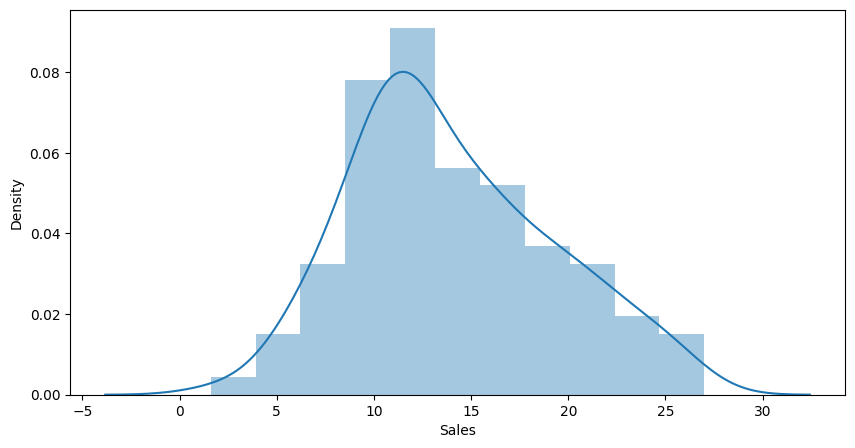

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(newdataset['Sales'])
plt.show()

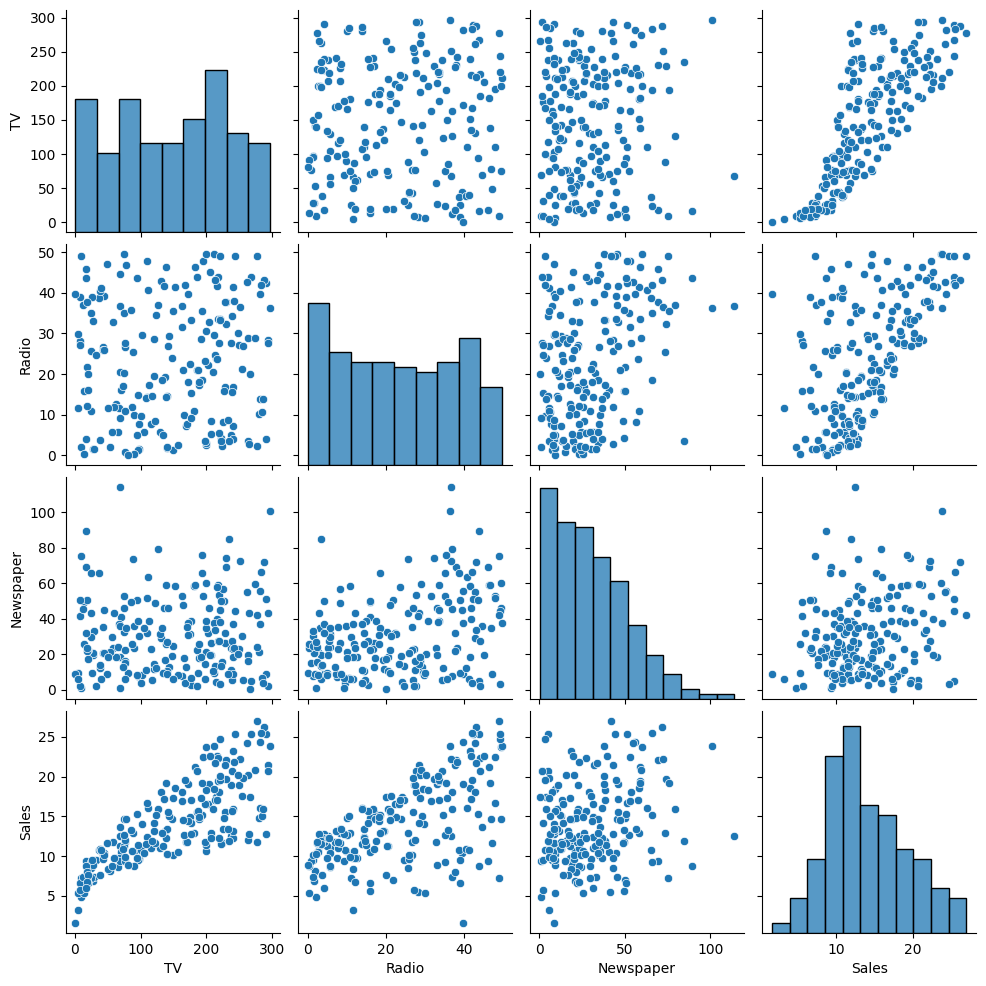

In [9]:
sns.pairplot(newdataset)

In [10]:
data_corr = newdataset.corr()
print("Correlation :\n")
data_corr

Correlation :



,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

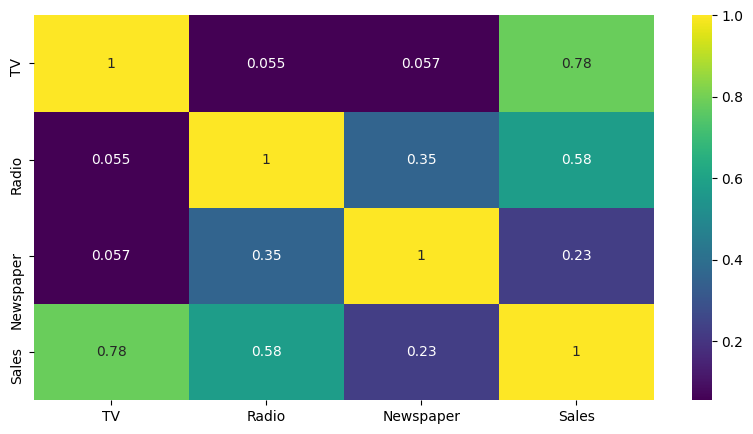

In [11]:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(data_corr, annot=True, cmap="viridis")

In [12]:
x = np.array(newdataset.drop(labels=['Sales'], axis=1))
y = np.array(newdataset['Sales'])

## TRAINING AND TESTING THE MODEL

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [15]:
x_train.shape

(150, 3)

In [16]:
x_test.shape

(50, 3)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear = LinearRegression()

In [19]:
linear.fit(x_train,y_train)

LinearRegression()

In [20]:
prediction = linear.predict(x_test)
prediction

array([10.0494569 ,  7.43052335,  6.97152143, 24.16378667, 12.00215643,
        6.54334645, 13.09526331, 14.95879164, 11.00528358, 16.27234553,
       22.99324688,  9.12188347, 10.33545333, 15.39628185, 11.60589932,
       12.11484332, 18.60251172, 10.81414474, 16.07541355, 17.22753644,
       24.2342995 ,  9.47711838, 15.13960412, 12.41064749,  5.67814427,
       15.22889947, 12.21635459, 20.94370559, 13.28068231,  9.16578351,
       13.30285718, 21.5770033 , 18.098111  , 21.15572322,  6.69734039,
        6.15355714,  7.96280151, 13.09426248, 14.81032968,  6.22020075,
       12.2799744 ,  9.1817324 , 15.04882696, 16.26091437, 17.16859664,
       13.32831849,  3.69143664, 12.43931798, 15.87909695,  8.68626862])

In [21]:
coefficient = linear.coef_
coefficient

array([0.04416235, 0.19900368, 0.00116268])

In [22]:
intercept = linear.intercept_
intercept

2.89257005115115

In [23]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': prediction    
})

In [24]:
result

,actual,predicted
0,11.3,10.049457
1,8.4,7.430523
2,8.7,6.971521
3,25.4,24.163787
4,11.7,12.002156
5,8.7,6.543346
6,7.2,13.095263
7,13.2,14.958792
8,9.2,11.005284
9,16.6,16.272346


In [25]:
new1 = [[1.000000,0.054809,0.056648]]
linear.predict(new1)[0]

2.9477054538815564

## EVALUATING THE MODEL

In [26]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [27]:
r2_score(y_test,prediction)

0.8576396745320893

In [28]:
mean_absolute_error(y_test,prediction)

1.3000320919235449

In [29]:
mean_squared_error(y_test,prediction)

4.012497522917099

## PREDICTED SALES GRAPH

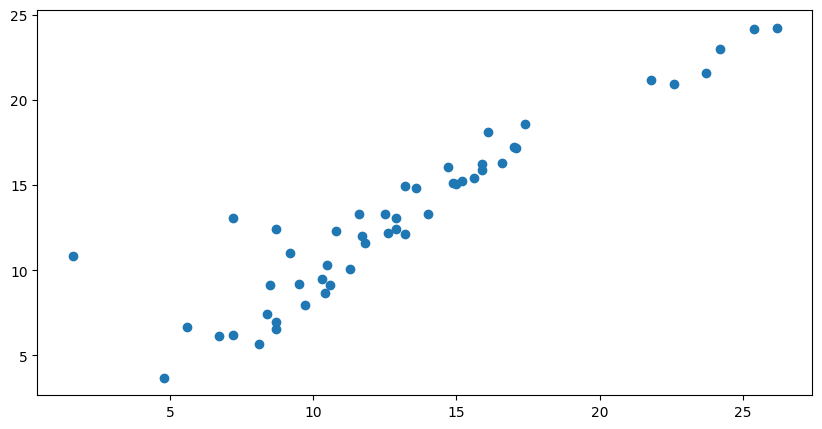

In [30]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, prediction)